In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
mdf = pd.read_excel('../DATA/DS4002P2_RawData.xlsx', sheet_name=2)

In [75]:
mdf = mdf.set_index('observation_date')

In [76]:
ydf = pd.read_excel('../DATA/DS4002P2_RawData.xlsx', sheet_name=1)

In [77]:
ydf = ydf.set_index('observation_date')

In [78]:
ydf = ydf.rename(columns={'HLTHSCPIBLEND_PC1':'hei'})

In [79]:
ydf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2001-01-01 to 2021-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hei     21 non-null     float64
dtypes: float64(1)
memory usage: 336.0 bytes


In [80]:
mdf = mdf.rename(columns={'CPIAUCSL_PC1':'cpi', 'CPIMEDSL_PC1':'mcpi'})

In [81]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 2000-12-01 to 2025-01-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpi     290 non-null    float64
 1   mcpi    290 non-null    float64
dtypes: float64(2)
memory usage: 6.8 KB


In [82]:
mdf.isnull().sum()

cpi     0
mcpi    0
dtype: int64

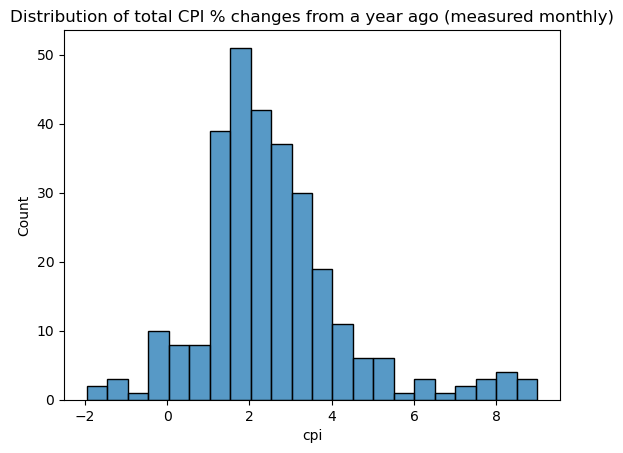

In [83]:
sns.histplot(mdf, x='cpi')
plt.title('Distribution of total CPI % changes from a year ago (measured monthly)')
plt.savefig('../OUTPUT/eda1.png')
plt.show()

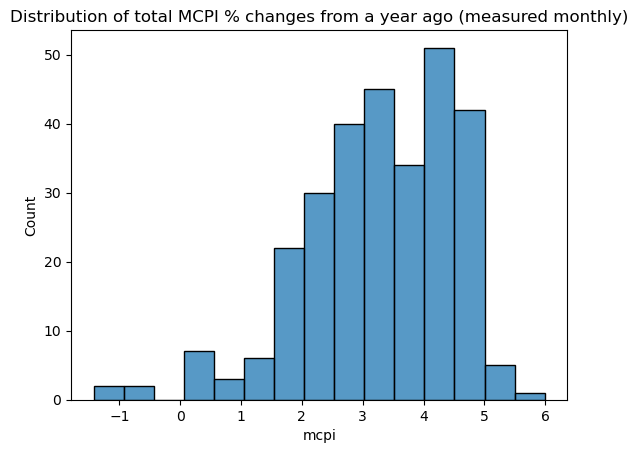

In [84]:
sns.histplot(mdf, x='mcpi')
plt.title('Distribution of total MCPI % changes from a year ago (measured monthly)')
plt.savefig('../OUTPUT/eda2.png')
plt.show()

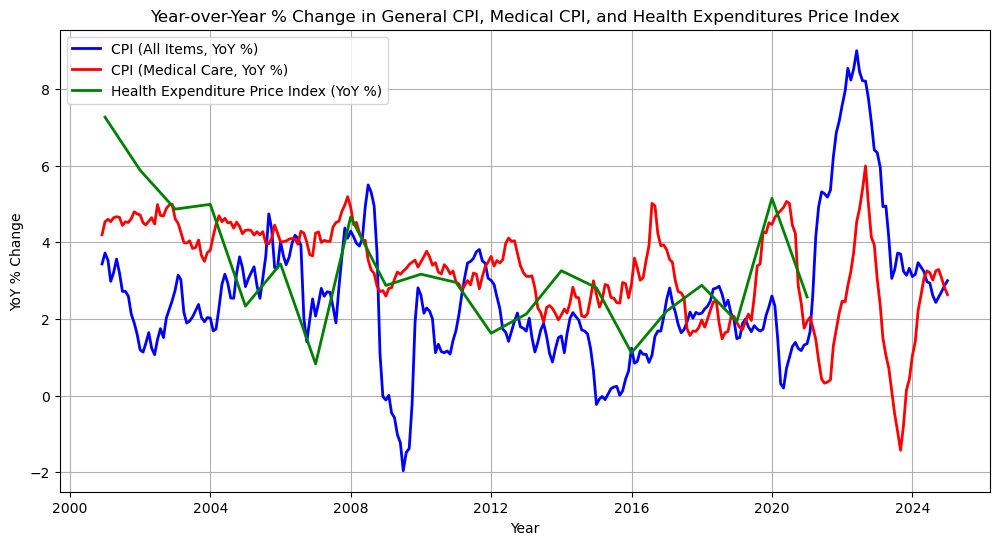

In [85]:
plt.figure(figsize=(12,6))
plt.plot(mdf.index, mdf['cpi'], label="CPI (All Items, YoY %)", linewidth=2, color='blue')
plt.plot(mdf.index, mdf['mcpi'], label="CPI (Medical Care, YoY %)", linewidth=2, color='red')
plt.plot(ydf.index, ydf['hei'], label="Health Expenditure Price Index (YoY %)", linewidth=2, color='green')

plt.xlabel("Year")
plt.ylabel("YoY % Change")
plt.title("Year-over-Year % Change in General CPI, Medical CPI, and Health Expenditures Price Index")
plt.legend()
plt.grid()
plt.savefig('../OUTPUT/eda3.png')
plt.show()

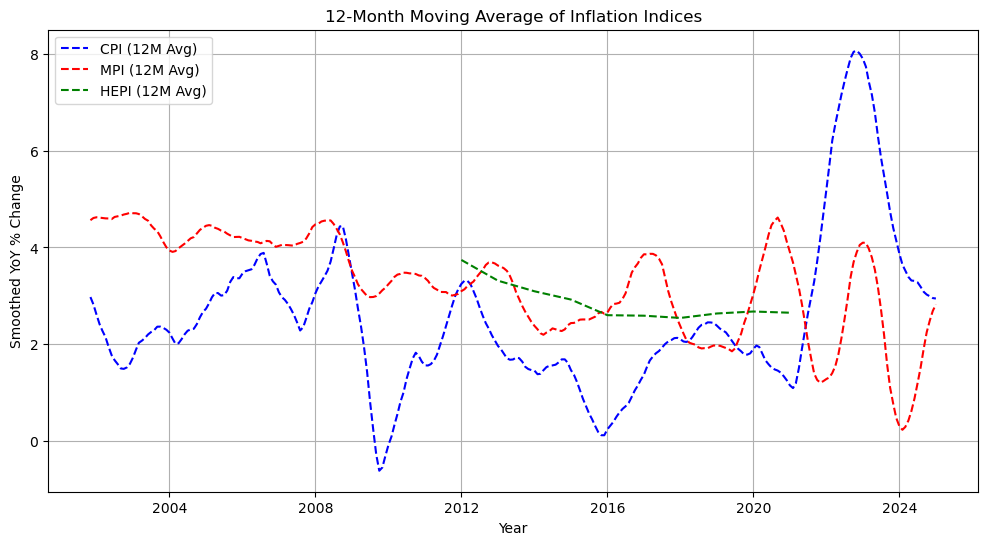

In [86]:
mdf['cpi_12ma'] = mdf['cpi'].rolling(12).mean()
mdf['mcpi_12ma'] = mdf['mcpi'].rolling(12).mean()
ydf['hei_12ma'] = ydf['hei'].rolling(12).mean()

plt.figure(figsize=(12,6))
plt.plot(mdf.index, mdf['cpi_12ma'], label="CPI (12M Avg)", linestyle='dashed', color='blue')
plt.plot(mdf.index, mdf['mcpi_12ma'], label="MPI (12M Avg)", linestyle='dashed', color='red')
plt.plot(ydf.index, ydf['hei_12ma'], label="HEPI (12M Avg)", linestyle='dashed', color='green')

plt.xlabel("Year")
plt.ylabel("Smoothed YoY % Change")
plt.title("12-Month Moving Average of Inflation Indices")
plt.legend()
plt.grid()
plt.savefig('../OUTPUT/eda4.png')
plt.show()